In [1]:
## Regression Analysis quantifies the relation between
## two variables and with this relation we can 
## forecast the value of the dependent variable
## using historical data


## Dependent variable - y
## Independent variable - explanatory (x)

## y = mx + b
## y = b + ax

## Simple regression fits a line through the set of points
## The best fit line is determined by calculating and summing the errors of each line
## and apllying the line with the least estimation error



# Running a Regression

In [2]:
## OLS regression
## or order of least squares regression


import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt


In [3]:
data = pd.read_excel('C:/Users/Housing.xlsx')

In [4]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


In [5]:
data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


# Univariate Regression

In [6]:
X = data['House Size (sq.ft.)']
Y = data['House Price']


In [7]:
X

0     1940
1     1300
2     1420
3     1680
4     1270
5     1850
6     1000
7     1100
8     1600
9     1000
10    2150
11    1900
12    2200
13    1100
14     860
15    1325
16    1350
17    1600
18     950
19    1250
Name: House Size (sq.ft.), dtype: int64

In [8]:
Y

0     1116000
1      860000
2      818400
3     1000000
4      640000
5     1010000
6      600000
7      700000
8     1100000
9      570000
10     860000
11    1085000
12    1250000
13     850000
14     640000
15     900000
16     730000
17     750000
18     650000
19     680000
Name: House Price, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

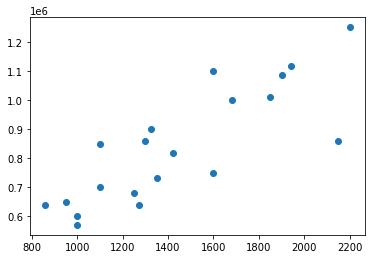

In [9]:
plt.scatter(X,Y)
plt.show

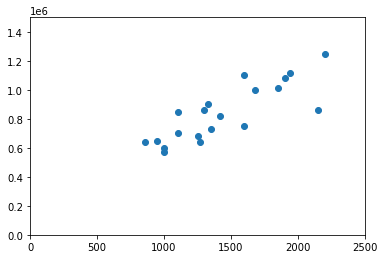

In [10]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.show()

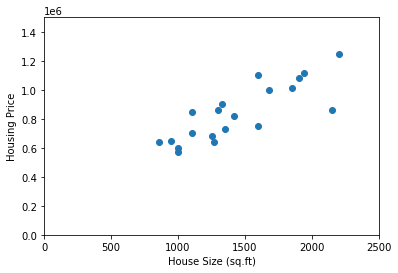

In [11]:
plt.scatter(X,Y)
plt.axis([0, 2500, 0, 1500000])
plt.ylabel('Housing Price')
plt.xlabel('House Size (sq.ft)')
plt.show()

# How to Distinguish Good Regressions

In [12]:
# Reliable Regressions:
## A simple regression will omit some important
## factors, which will result in an estimation error

## It is useful, but it's not perfect

## Regression model:
## Y = a + bx + error

## The error is called residuals

## The best fitting line minimizes the sum of 
## the squared residuals

## the coefficient b is called the ols estimate
## or ordinary least square estimates

## some variables are better at predicting other variables

## Ssome regressions have higher explanatory power than others

## Good vs BAd regressions can be quantified using R square

## How can we measure data dispersion and variability?

## we use variance to measure the variability of data
## s^2 = Sum[(x-x(bar))^2]/(n-1)

## Total sum of squares (TSS) provides a sense of the
## variability of data
## TSS = Sum[(x-x(bar))^2]

## SSR = Sum[(y-y(bar))^2]

## R^2 = 1 - SSR/TSS


# Computing: Alpha, Beta, and R2

In [13]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

In [14]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     37.95
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           8.13e-06
Time:                        11:33:03   Log-Likelihood:                -260.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      18   BIC:                             526.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.608e+05   9.76e+04      2.673      0.016    5.58e+04    4.66e+05
House Size (sq.ft.)   401.9163     65.243      6.160      0.000     264.846     538.987
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.715
Skew:                          -0.459   Prob(JB):                        0.699
Kurtosis:                       2.884   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
260800+402*1000

662800

In [16]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [17]:
slope

401.91628631922595

In [18]:
intercept

260806.2360560964

In [19]:
r_value

0.8235775534696924

In [20]:
r_value ** 2

0.678279986579124

In [21]:
p_value


8.129642377231308e-06

In [22]:
std_err

65.24299510636492

# Multivariate Regression

$$
Y_i = \beta_0+\beta_1X_1+\beta_2X_2+\beta_iX_i+\epsilon_i
$$

In [23]:
## Beta coefficients estimated in a multiv ariate regression
## can be interpreted as the marginal impact of the 
## explanatory variable

## The R^2 helps us determine how effective the regression
## In best pratice each additional explanatory variable
## that we add should increase the R^2 or predictive 
## power of the model

## Another metric to consider is the p-value of the beta coefficient

## the p-value indicates the probability that the
## beta coefficients should have been different

## in general a low p-value is a low chance that 
## the beta coefficient is different than estimated

## i.e. a p-value that is lower than 5% permits us to state:
## "We can be 95% confident that the beta coefficient we've 
## estimated is different than 0"

In [24]:
data

,House Price,House Size (sq.ft.),State,Number of Rooms,Year of Construction
0,1116000,1940,IN,8,2002
1,860000,1300,IN,5,1992
2,818400,1420,IN,6,1987
3,1000000,1680,IN,7,2000
4,640000,1270,IN,5,1995
5,1010000,1850,IN,7,1998
6,600000,1000,IN,4,2015
7,700000,1100,LA,4,2014
8,1100000,1600,LA,7,2017
9,570000,1000,NY,5,1997


*** Independent Variables: "House Size (sq.ft.)", "Number of Rooms", "Year of Construction"

In [25]:
X = data[['House Size (sq.ft.)','Number of Rooms', 'Year of Construction']]
Y = data['House Price']

In [26]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     14.90
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           6.82e-05
Time:                        11:40:37   Log-Likelihood:                -258.43
No. Observations:                  20   AIC:                             524.9
Df Residuals:                      16   BIC:                             528.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.452e+06    5.4e+06     -1.752      0.099   -2.09e+07    1.99e+06
House Size (sq.ft.)    341.8271    179.666      1.903      0.075     -39.049     722.703
Number of Rooms        1.16e+04   3.74e+04      0.310      0.760   -6.77e+04    9.08e+04
Year of Construction  4863.5761   2697.969      1.803      0.090    -855.862    1.06e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.747
Skew:                          -0.676   Prob(JB):                        0.418
Kurtosis:                       2.484   Cond. No.                     5.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*** Independent Variables: "House Size (sq.ft.)", "Number of Rooms"

In [27]:
X = data[['House Size (sq.ft.)','Number of Rooms']]
Y = data['House Price']

In [28]:
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     18.30
Date:                Wed, 24 Aug 2022   Prob (F-statistic):           5.77e-05
Time:                        11:55:21   Log-Likelihood:                -260.28
No. Observations:                  20   AIC:                             526.6
Df Residuals:                      17   BIC:                             529.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.737e+05   1.03e+05      2.655      0.017    5.62e+04    4.91e+05
House Size (sq.ft.)   314.1363    190.485      1.649      0.117     -87.752     716.025
Number of Rooms      1.944e+04   3.95e+04      0.492      0.629   -6.39e+04    1.03e+05
==============================================================================
Omnibus:                        1.326   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.515   Jarque-Bera (JB):                0.810
Skew:                          -0.487   Prob(JB):                        0.667
Kurtosis:                       2.853   Cond. No.                     5.89e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*** Independent Variables: "House Size (sq.ft.)", "Year of Construction"

In [30]:
X = data[['House Size (sq.ft.)', 'Year of Construction']]
Y = data['House Price']

In [31]:
X1= sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     23.55
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           1.26e-05
Time:                        09:12:31   Log-Likelihood:                -258.49
No. Observations:                  20   AIC:                             523.0
Df Residuals:                      17   BIC:                             526.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9.654e+06   5.21e+06     -1.852      0.081   -2.07e+07    1.34e+06
House Size (sq.ft.)    394.0417     61.098      6.449      0.000     265.137     522.947
Year of Construction  4960.9407   2607.443      1.903      0.074    -540.283    1.05e+04
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.689
Skew:                          -0.663   Prob(JB):                        0.430
Kurtosis:                       2.480   Cond. No.                     5.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

*** Independent Variables: "Number of Rooms", "Year of Construction"

In [33]:
X = data [['Number of Rooms', 'Year of Construction']]
Y = data ['House Price']

In [34]:
X1 = sm.add_constant(X)

reg = sm.OLS(Y,X1).fit()

reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     17.79
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           6.79e-05
Time:                        09:17:39   Log-Likelihood:                -260.47
No. Observations:                  20   AIC:                             526.9
Df Residuals:                      17   BIC:                             529.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.471e+06   5.77e+06     -1.468      0.160   -2.06e+07     3.7e+06
Number of Rooms       7.824e+04    1.4e+04      5.574      0.000    4.86e+04    1.08e+05
Year of Construction  4424.7160   2887.793      1.532      0.144   -1667.996    1.05e+04
==============================================================================
Omnibus:                        2.115   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                1.400
Skew:                          -0.407   Prob(JB):                        0.497
Kurtosis:                       1.991   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""